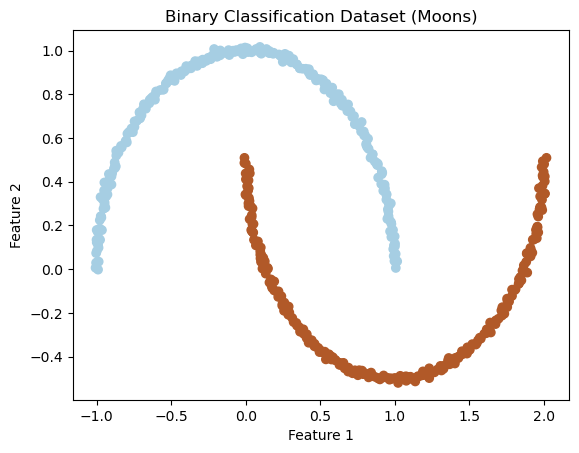

In [88]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,y = make_moons(n_samples=500, noise=0.01, random_state=42)

# Scale down Feature 1
X_scaled = X.copy()
X_scaled[:, 0] = X_scaled[:, 0] * 0.8  # Scale Feature 1 by 0.8

# Re-split the dataset
from sklearn.model_selection import train_test_split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Binary Classification Dataset (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

print(f"Training set shape: {X_train_scaled.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test_scaled.shape}, {y_test.shape}")


Training set shape: (400, 2), (400,)
Testing set shape: (100, 2), (100,)


In [90]:
import numpy as np

def initialize_parameters(input_dim, hidden_dim, output_dim):
    np.random.seed(42)  # For reproducibility
    W1 = np.random.randn(input_dim, hidden_dim) * 0.01  # Input to hidden weights
    b1 = np.zeros((1, hidden_dim))                     # Hidden biases
    W2 = np.random.randn(hidden_dim, output_dim) * 0.01  # Hidden to output weights
    b2 = np.zeros((1, output_dim))                     # Output biases
    return W1, b1, W2, b2

# Dimensions of our network
input_dim = X_train_scaled.shape[1]  # Number of features (2 for our dataset)
hidden_dim = 16               # Number of neurons in the hidden layer
output_dim = 1                # Binary classification (1 output neuron)

# Initialize parameters
W1, b1, W2, b2 = initialize_parameters(input_dim, hidden_dim, output_dim)

# Print shapes for confirmation
print(f"W1 shape: {W1.shape}, b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}, b2 shape: {b2.shape}")


W1 shape: (2, 16), b1 shape: (1, 16)
W2 shape: (16, 1), b2 shape: (1, 1)


In [91]:
# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

# Forward propagation function
def forward_propagation(X, W1, b1, W2, b2):
    # Hidden layer calculations
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    
    # Output layer calculations
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2


In [92]:
def compute_loss_with_regularization(y, A2, W1, W2, lambda_):
    m = y.shape[0]
    cross_entropy_loss = -np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2)) / m
    l2_regularization = (lambda_ / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return cross_entropy_loss + l2_regularization


In [93]:
# Calculate loss
loss = compute_loss(y_train.reshape(-1, 1), A2)
print(f"Initial Loss: {loss:.4f}")


Initial Loss: 0.6494


In [94]:
# Perform forward propagation
Z1, A1, Z2, A2 = forward_propagation(X_train_scaled, W1, b1, W2, b2)

# Print shapes to confirm
print(f"Z1 shape: {Z1.shape}, A1 shape: {A1.shape}")
print(f"Z2 shape: {Z2.shape}, A2 shape: {A2.shape}")



Z1 shape: (400, 16), A1 shape: (400, 16)
Z2 shape: (400, 1), A2 shape: (400, 1)


In [95]:
def backward_propagation_with_regularization(X, y, Z1, A1, A2, W2, W1, lambda_):
    m = X.shape[0]
    
    # Gradients for output layer
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m + (lambda_ / m) * W2  # Add regularization
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    # Gradients for hidden layer
    dZ1 = np.dot(dZ2, W2.T) * (Z1 > 0)  # ReLU derivative
    dW1 = np.dot(X.T, dZ1) / m + (lambda_ / m) * W1  # Add regularization
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2



In [96]:
# Calculate gradients
dW1, db1, dW2, db2 = backward_propagation(X_train_scaled, y_train.reshape(-1, 1), Z1, A1, A2, W2)

# Print shapes to confirm
print(f"dW1 shape: {dW1.shape}, db1 shape: {db1.shape}")
print(f"dW2 shape: {dW2.shape}, db2 shape: {db2.shape}")


dW1 shape: (2, 16), db1 shape: (1, 16)
dW2 shape: (16, 1), db2 shape: (1, 1)


In [97]:
# Set learning rate
learning_rate = 0.01

# Update parameters
W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

# Print updated parameters (first few values for confirmation)
print(f"Updated W1: {W1.flatten()[:5]}")
print(f"Updated b1: {b1.flatten()[:5]}")
print(f"Updated W2: {W2.flatten()[:5]}")
print(f"Updated b2: {b2.flatten()[:5]}")


Updated W1: [ 0.00496695 -0.00139815  0.00648835  0.01521357 -0.00233847]
Updated b1: [-2.41333882e-07  2.10221000e-05  1.41932156e-05 -1.92346825e-05
 -3.99452175e-06]
Updated W2: [-0.0001084  -0.01058524  0.00825207 -0.0121599   0.00205669]
Updated b2: [-0.00017448]


Epoch 0: Loss = 0.6492
Epoch 100: Loss = 0.6196
Epoch 200: Loss = 0.5760
Epoch 300: Loss = 0.5198
Epoch 400: Loss = 0.4585
Epoch 500: Loss = 0.4026
Epoch 600: Loss = 0.3587
Epoch 700: Loss = 0.3272
Epoch 800: Loss = 0.3055
Epoch 900: Loss = 0.2906


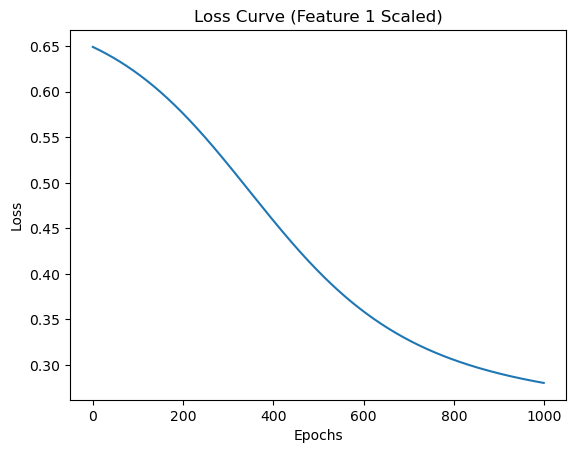

In [102]:
# Training loop with L2 regularization
lambda_ = 0.1  # Regularization strength
losses = []

for epoch in range(epochs):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X_train_scaled, W1, b1, W2, b2)
    
    # Compute loss
    loss = compute_loss_with_regularization(y_train.reshape(-1, 1), A2, W1, W2, lambda_)
    losses.append(loss)
    
    # Backward propagation
    dW1, db1, dW2, db2 = backward_propagation_with_regularization(X_train_scaled, y_train.reshape(-1, 1), Z1, A1, A2, W2, W1, lambda_)
    
    # Update parameters
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Loss Curve (Feature 1 Scaled)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Test Accuracy (Feature 1 Scaled): 0.88


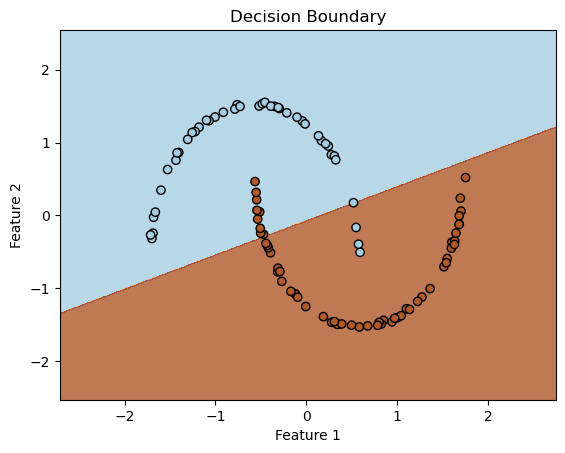

In [104]:
# Evaluate the model
def evaluate_model(X, y, W1, b1, W2, b2):
    # Forward propagation
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    
    # Convert probabilities to binary predictions
    predictions = (A2 > 0.5).astype(int)
    
    # Calculate accuracy
    accuracy = np.mean(predictions == y.reshape(-1, 1))
    return accuracy

# Evaluate the model on the scaled test set
test_accuracy_scaled = evaluate_model(X_test_scaled, y_test, W1, b1, W2, b2)
print(f"Test Accuracy (Feature 1 Scaled): {test_accuracy_scaled:.2f}")

# Plot the decision boundary for the scaled test set
plot_decision_boundary(model, X_test_scaled, y_test)


In [100]:
def model(X):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)



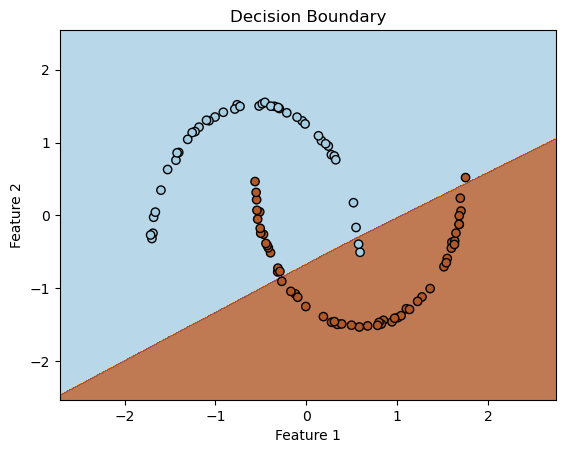

Weights for Feature 1: [ 3.92825369e-02 -5.70888409e-02  7.49873909e-02  2.73122339e-02
 -3.53104764e-02 -7.55503395e-02 -5.76808480e-03  6.60389793e-02
  3.44566680e-02  1.72555032e-02  1.35975735e-02 -3.30544498e-02
  3.74164635e-05 -6.86510587e-02 -4.76493437e-02 -1.58059672e-02]
Weights for Feature 2: [-0.06493034  0.08886173 -0.12101919 -0.03321664  0.0610172   0.11553548
  0.02704306 -0.10817664 -0.06069507 -0.01926436 -0.03435661  0.05027348
 -0.00210188  0.07987304  0.04238678  0.0329371 ]


In [101]:
def plot_decision_boundary(model, X, y):
    # Define the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict for each point in the grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot decision boundary for the test set
plot_decision_boundary(model, X_test_scaled, y_test)
print("Weights for Feature 1:", W1[0])
print("Weights for Feature 2:", W1[1])
